Mount google drive

In [345]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [346]:
import os
import re
import nltk
import spacy
import string
#import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [347]:
!pip install textract

  Using cached pdfminer.six-20191110-py2.py3-none-any.whl (5.6 MB)
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20221105
    Uninstalling pdfminer.six-20221105:
      Successfully uninstalled pdfminer.six-20221105
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdfplumber 0.10.3 requires pdfminer.six==20221105, but you have pdfminer-six 20191110 which is incompatible.


In [348]:
os.listdir('/content/drive/MyDrive/Resumes')

['.DS_Store',
 'workday resumes',
 'SQL Developer Lightning insight',
 'Peoplesoft resumes',
 'React JS Developer']

Extracting the text from the dataset

In [349]:
import textract

In [350]:
file_path1 = []
category1  = []
directory1 = '/content/drive/MyDrive/Resumes/Peoplesoft resumes/'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [351]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
1,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
2,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
3,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
5,Classification: Internal\n\nClassification: In...,PeopleSoft
6,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
7,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft


In [352]:
file_path2 = []
category2  = []
directory2 = '/content/drive/MyDrive/Resumes/React JS Developer/'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [353]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...,React JS Developer
1,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer
2,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer
3,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer
4,Name: Ravali P \n\n\n\n ...,React JS Developer
5,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer
6,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer
7,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer
8,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
9,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer


In [354]:
file_path3 = []
category3  = []
directory3 = '/content/drive/MyDrive/Resumes/SQL Developer Lightning insight/'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('SQL Developer')

In [355]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,SQL AND MSBI DEVELOPER\n\nSQL AND MSBI DEVELOP...,SQL Developer
1,Resume\n\nName : Neeraj Mishra\n\n\n\nExp...,SQL Developer
2,BUDDHA VAMSI ...,SQL Developer
3,RAJU PAVANA KUMARI\n\n\n\n\t\n\n\tProfessional...,SQL Developer
4,ANIL KUMAR MADDUKURI \t\t\n\nSQL & MSBI Devel...,SQL Developer
5,Aradhana Tripathi\n\n\n\nCurrent Location: Gac...,SQL Developer
6,resume\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\tRama...,SQL Developer
7,Name: Ramesh\n\n\t\n\n\tCareer Objective: \n\n...,SQL Developer
8,SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...,SQL Developer
9,SQL DEVELOPER\n\nName: - Bandi prem sai\n\n\...,SQL Developer


In [356]:

file_path4 = []
category4  = []
directory4 = '/content/drive/MyDrive/Resumes/workday resumes/'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('Workday')

In [357]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday
1,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday
2,Workday HCM Techno functional Consultant ...,Workday
3,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...,Workday
4,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...,Workday
5,G Himaja\n\n ...,Workday
6,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...,Workday
7,Srikanth (WORKDAY hCM Consultant)\t ...,Workday
8,Vinay kumar .v\nWorkday Functional Consultant\...,Workday
9,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday


Creating a DataFrame

In [358]:
Resume_data = data1.append([data2, data3, data4], ignore_index = True)
Resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN
1,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
2,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN
3,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
5,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
6,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
7,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN


In [359]:
Resume_data.shape

(52, 5)

In [360]:
Resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  52 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    11 non-null     object
 4   Category4    11 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


Merging all the columns into one

In [361]:
Resume_data['Category'] = category1 + category2 + category3 + category4
Resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
5,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
6,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
7,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
9,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft,NaN,NaN,NaN,PeopleSoft


Dropping other 4 columns

In [362]:
Resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = Resume_data[["Category", "Raw_Details"]]

Our final data

In [363]:
resume_data

,Category,Raw_Details
0,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
1,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
2,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
3,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
5,PeopleSoft,Classification: Internal\n\nClassification: In...
6,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
7,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [364]:
resume_data.shape

(52, 2)

In [365]:
resume_data["Raw_Details"][3]

"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n\nSIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPROFILE SUMMARY\n\n\n\nI have overall 6.8 years’ experience as PeopleSoft Administrator. Installed PeopleTools 8.55 from the scratch including its products. \n\nExperience in Peopletools 8.51, 8.54.08, 8.55.07&Application 9.0 and 9.2 (HRMS/FSCM). Deterministic approach towards problem solving & troubleshooting.\n\nProficient in Integration Broker.\n\nUpgraded FSCM and HCM applications to PeopleTools 8.55.07 from PeopleTools 8.54.08.\n\n\n\nEDUCATION\n\n\n\nGraduated B-Tech in Electronics and Communication Engg. from M.V.G.R College of Engineering, Vizianagaram(JNTUK) with an aggregate of 68.93%.\n\nAchieved 90% marks in 12th standard. Scored 86% in 10th standard.\n\n\n\nACHIEVEMENTS\n\nAwarded Bravo in 2015 Q3, 2016 Q1 and Pat on Back in Q2, 2016, Q1, 2017 in Techahindra.\n\nAwarded Associate of the month award and Innovator of the month (1 ti

Saving the file as csv

In [366]:
resume_data.to_csv("raw_resume.csv")

In [367]:
resume_data

,Category,Raw_Details
0,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
1,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
2,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
3,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
5,PeopleSoft,Classification: Internal\n\nClassification: In...
6,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
7,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [368]:
resume_data=pd.read_csv("raw_resume.csv")
resume_data

,Unnamed: 0,Category,Raw_Details
0,0,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
1,1,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
2,2,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...
3,3,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n..."
4,4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
5,5,PeopleSoft,Classification: Internal\n\nClassification: In...
6,6,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
7,7,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...
8,8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...
9,9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...


In [369]:
resume_data[resume_data.Category == 'Workday']

,Unnamed: 0,Category,Raw_Details
41,41,Workday,Mooraboyina Guravaiah\n\nWorkday Integration S...
42,42,Workday,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...
43,43,Workday,Workday HCM Techno functional Consultant ...
44,44,Workday,VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...
45,45,Workday,WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...
46,46,Workday,G Himaja\n\n ...
47,47,Workday,Name : Gopi Krishna Reddy\n\n\t\t\t\t ...
48,48,Workday,Srikanth (WORKDAY hCM Consultant)\t ...
49,49,Workday,Vinay kumar .v\nWorkday Functional Consultant\...
50,50,Workday,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...


In [370]:
resume_data.isnull().sum()

Unnamed: 0     0
Category       0
Raw_Details    0
dtype: int64

Word Count

In [371]:
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(" ")))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356
1,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
2,PeopleSoft Administration\n\n \n\nVivekanand S...,2585
3,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918


Characters count

In [372]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len()  #including spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,2150
1,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
2,PeopleSoft Administration\n\n \n\nVivekanand S...,16112
3,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",3800
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943


Number of stopwords

In [373]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details','Stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Raw_Details,Stopwords
0,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,42
1,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
2,PeopleSoft Administration\n\n \n\nVivekanand S...,520
3,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",86
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225


Numbers count

In [374]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details','Numerics']].head()

,Raw_Details,Numerics
0,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,8
1,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
2,PeopleSoft Administration\n\n \n\nVivekanand S...,17
3,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",15
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4


In [375]:
resume_data

,Unnamed: 0,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,0,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
1,1,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
2,2,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,2585,16112,520,17
3,3,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",455,3800,86,15
4,4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
5,5,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
6,6,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
7,7,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,433,3669,84,13
8,8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,448,3714,88,13
9,9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,540,3577,136,3


Text Preprocessing

In [376]:

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [377]:
resume_data = pd.read_csv('raw_resume.csv',index_col=0)
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))


In [378]:
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
1,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
2,PeopleSoft,PeopleSoft Administration\n\n \n\nVivekanand S...,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",sirazuddin bangalore india sirazuddin bangalor...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
6,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
7,PeopleSoft,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,murali professional summary years experience p...
8,PeopleSoft,Hari Narayana \t\t \n\n\t\n\n\n\n...,hari narayana professional summary years exper...
9,PeopleSoft,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,priyabrata hota career objective pursuing peop...


In [379]:
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,address manyata tech park nagavara bangalore l...
1,PeopleSoft,anubhav kumar singh core competencies scriptin...
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,classification internal classification interna...
6,PeopleSoft,tanna sujatha objective seeking challenging ro...
7,PeopleSoft,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...


Cleaned Resume

In [380]:
resume_data.to_csv('Cleaned_Resumes.csv', index = False)

In [381]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data

,Category,Resume_Details
0,PeopleSoft,address manyata tech park nagavara bangalore l...
1,PeopleSoft,anubhav kumar singh core competencies scriptin...
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,classification internal classification interna...
6,PeopleSoft,tanna sujatha objective seeking challenging ro...
7,PeopleSoft,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...


In [382]:
resume_data.Resume_Details[4]

'peoplesoft admin varkala vikas career objective total years experience peoplesoft admin peoplesoft dba hope enhance skill set adding value business enable implementation solutions aid company objectives understanding anticipating needs interests motivations clients deliver time budget quality delivering value improving agility quality reliability professional summary years experience peoplesoft implementation support people tools upgrades configuration migrations maintenance administration application server domains process scheduler servers web server domains pum elastic search involved various tools application upgrades experience driving infrastructure hardware upgrades disaster recovery activities configured secure web server ssl administration monitor system developing maintaining monitoring shell scripts experience oracle database administration experience health check peoplesoft environments experience peoplesoft database refreshes production development testing environments ex

Tokenization

In [383]:
import nltk
nltk.download('punkt')
resume_data['Tokenized_Resumes'] = resume_data['Resume_Details'].apply(lambda x: nltk.word_tokenize(x))
resume_data.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Category,Resume_Details,Tokenized_Resumes
0,PeopleSoft,address manyata tech park nagavara bangalore l...,"[address, manyata, tech, park, nagavara, banga..."
1,PeopleSoft,anubhav kumar singh core competencies scriptin...,"[anubhav, kumar, singh, core, competencies, sc..."
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...,"[peoplesoft, administration, vivekanand, sayan..."
3,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,"[sirazuddin, bangalore, india, sirazuddin, ban..."
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,"[peoplesoft, admin, varkala, vikas, career, ob..."
5,PeopleSoft,classification internal classification interna...,"[classification, internal, classification, int..."
6,PeopleSoft,tanna sujatha objective seeking challenging ro...,"[tanna, sujatha, objective, seeking, challengi..."
7,PeopleSoft,murali professional summary years experience p...,"[murali, professional, summary, years, experie..."
8,PeopleSoft,hari narayana professional summary years exper...,"[hari, narayana, professional, summary, years,..."
9,PeopleSoft,priyabrata hota career objective pursuing peop...,"[priyabrata, hota, career, objective, pursuing..."


In [384]:
resume_data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

Stopwords removal

In [385]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in resume_data.iterrows():

    words_without_stopwords = [word for word in row.Resume_Details.split()]

    cleaned_resumes.append(' '.join(words_without_stopwords))

resume_data['Final_Clean_Resumes'] = cleaned_resumes
resume_data.head(10)

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,address manyata tech park nagavara bangalore l...,address manyata tech park nagavara bangalore l...
1,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,classification internal classification interna...,classification internal classification interna...
6,PeopleSoft,tanna sujatha objective seeking challenging ro...,tanna sujatha objective seeking challenging ro...
7,PeopleSoft,murali professional summary years experience p...,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...,priyabrata hota career objective pursuing peop...


In [386]:
Tokenized_Resume = resume_data['Final_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [address, manyata, tech, park, nagavara, banga...
1    [anubhav, kumar, singh, core, competencies, sc...
2    [peoplesoft, administration, vivekanand, sayan...
3    [sirazuddin, bangalore, india, sirazuddin, ban...
4    [peoplesoft, admin, varkala, vikas, career, ob...
5    [classification, internal, classification, int...
6    [tanna, sujatha, objective, seeking, challengi...
7    [murali, professional, summary, years, experie...
8    [hari, narayana, professional, summary, years,...
9    [priyabrata, hota, career, objective, pursuing...
Name: Final_Clean_Resumes, dtype: object

Lemmatization

In [387]:
import nltk
nltk.download('wordnet')
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [address, manyata, tech, park, nagavara, banga...
1    [anubhav, kumar, singh, core, competency, scri...
2    [peoplesoft, administration, vivekanand, sayan...
3    [sirazuddin, bangalore, india, sirazuddin, ban...
4    [peoplesoft, admin, varkala, vikas, career, ob...
5    [classification, internal, classification, int...
6    [tanna, sujatha, objective, seeking, challengi...
7    [murali, professional, summary, year, experien...
8    [hari, narayana, professional, summary, year, ...
9    [priyabrata, hota, career, objective, pursuing...
Name: Final_Clean_Resumes, dtype: object

In [388]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

resume_data['Final_Clean_Resumes'] = Tokenized_Resume
resume_data.head(10)

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,address manyata tech park nagavara bangalore l...,address manyata tech park nagavara bangalore l...
1,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,classification internal classification interna...,classification internal classification interna...
6,PeopleSoft,tanna sujatha objective seeking challenging ro...,tanna sujatha objective seeking challenging ro...
7,PeopleSoft,murali professional summary years experience p...,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...,priyabrata hota career objective pursuing peop...


NER

In [389]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Final_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 330), ('using', 253), ('workday', 232), ('sql', 213), ('application', 208), ('server', 188), ('project', 183), ('data', 180), ('reports', 170), ('peoplesoft', 169), ('business', 165), ('web', 145), ('knowledge', 136), ('react', 132), ('process', 123), ('skills', 118), ('system', 116), ('good', 108), ('client', 105), ('tools', 102), ('working', 101), ('involved', 99), ('database', 99), ('various', 97), ('creating', 97), ('like', 94), ('developer', 94), ('hcm', 94), ('support', 94), ('worked', 93), ('integrations', 92), ('development', 91), ('technical', 89), ('integration', 87), ('servers', 86), ('services', 85), ('report', 83), ('people', 81), ('created', 80), ('html', 80), ('design', 78), ('used', 77), ('team', 74), ('role', 74), ('responsibilities', 72), ('work', 71), ('studio', 71), ('eib', 71), ('testing', 70), ('management', 69)]


POS Tagging

In [390]:
nlp = spacy.load('en_core_web_sm')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style= 'ent', jupyter= True)

Count Vectoriser

In [391]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
review_cv=cv.fit_transform(resume_data["Final_Clean_Resumes"])

In [392]:
print(cv.get_feature_names_out()[100:2000])

['along' 'also' 'alter' ... 'packing' 'packs' 'page']


In [393]:
print(review_cv.toarray().shape)

(52, 3226)


In [394]:
resume_data

,Category,Resume_Details,Final_Clean_Resumes
0,PeopleSoft,address manyata tech park nagavara bangalore l...,address manyata tech park nagavara bangalore l...
1,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,classification internal classification interna...,classification internal classification interna...
6,PeopleSoft,tanna sujatha objective seeking challenging ro...,tanna sujatha objective seeking challenging ro...
7,PeopleSoft,murali professional summary years experience p...,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...,priyabrata hota career objective pursuing peop...


In [395]:
resume_data.drop(['Resume_Details'],axis=1,inplace=True)

In [396]:
resume_data

,Category,Final_Clean_Resumes
0,PeopleSoft,address manyata tech park nagavara bangalore l...
1,PeopleSoft,anubhav kumar singh core competencies scriptin...
2,PeopleSoft,peoplesoft administration vivekanand sayana ca...
3,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
5,PeopleSoft,classification internal classification interna...
6,PeopleSoft,tanna sujatha objective seeking challenging ro...
7,PeopleSoft,murali professional summary years experience p...
8,PeopleSoft,hari narayana professional summary years exper...
9,PeopleSoft,priyabrata hota career objective pursuing peop...


In [397]:
resume_data.Category.value_counts()

React JS Developer    20
SQL Developer         11
Workday               11
PeopleSoft            10
Name: Category, dtype: int64

Resume Categories

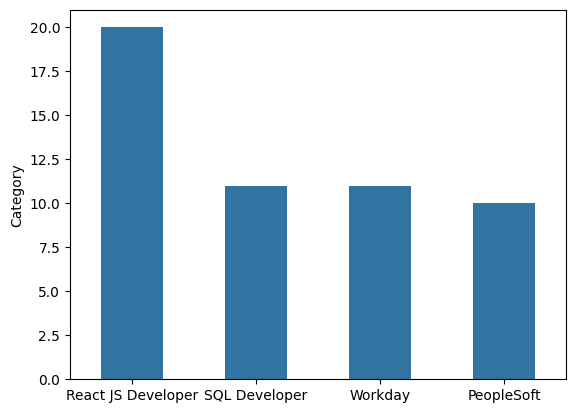

In [398]:
category_counts = resume_data['Category'].value_counts()

ax = sns.barplot(x=list(category_counts.index),y=category_counts,width=0.5)


N gram---Used to see which word often show up together

In [399]:
from textblob import TextBlob
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [400]:
TextBlob(resume_data['Final_Clean_Resumes'][1]).ngrams(2)[:20]

[WordList(['anubhav', 'kumar']),
 WordList(['kumar', 'singh']),
 WordList(['singh', 'core']),
 WordList(['core', 'competencies']),
 WordList(['competencies', 'scripting']),
 WordList(['scripting', 'shell']),
 WordList(['shell', 'scripting']),
 WordList(['scripting', 'application']),
 WordList(['application', 'peoplesoft']),
 WordList(['peoplesoft', 'hcm']),
 WordList(['hcm', 'financials']),
 WordList(['financials', 'operating']),
 WordList(['operating', 'system']),
 WordList(['system', 'linux']),
 WordList(['linux', 'windows']),
 WordList(['windows', 'web']),
 WordList(['web', 'app']),
 WordList(['app', 'servers']),
 WordList(['servers', 'weblogic']),
 WordList(['weblogic', 'tuxedo'])]

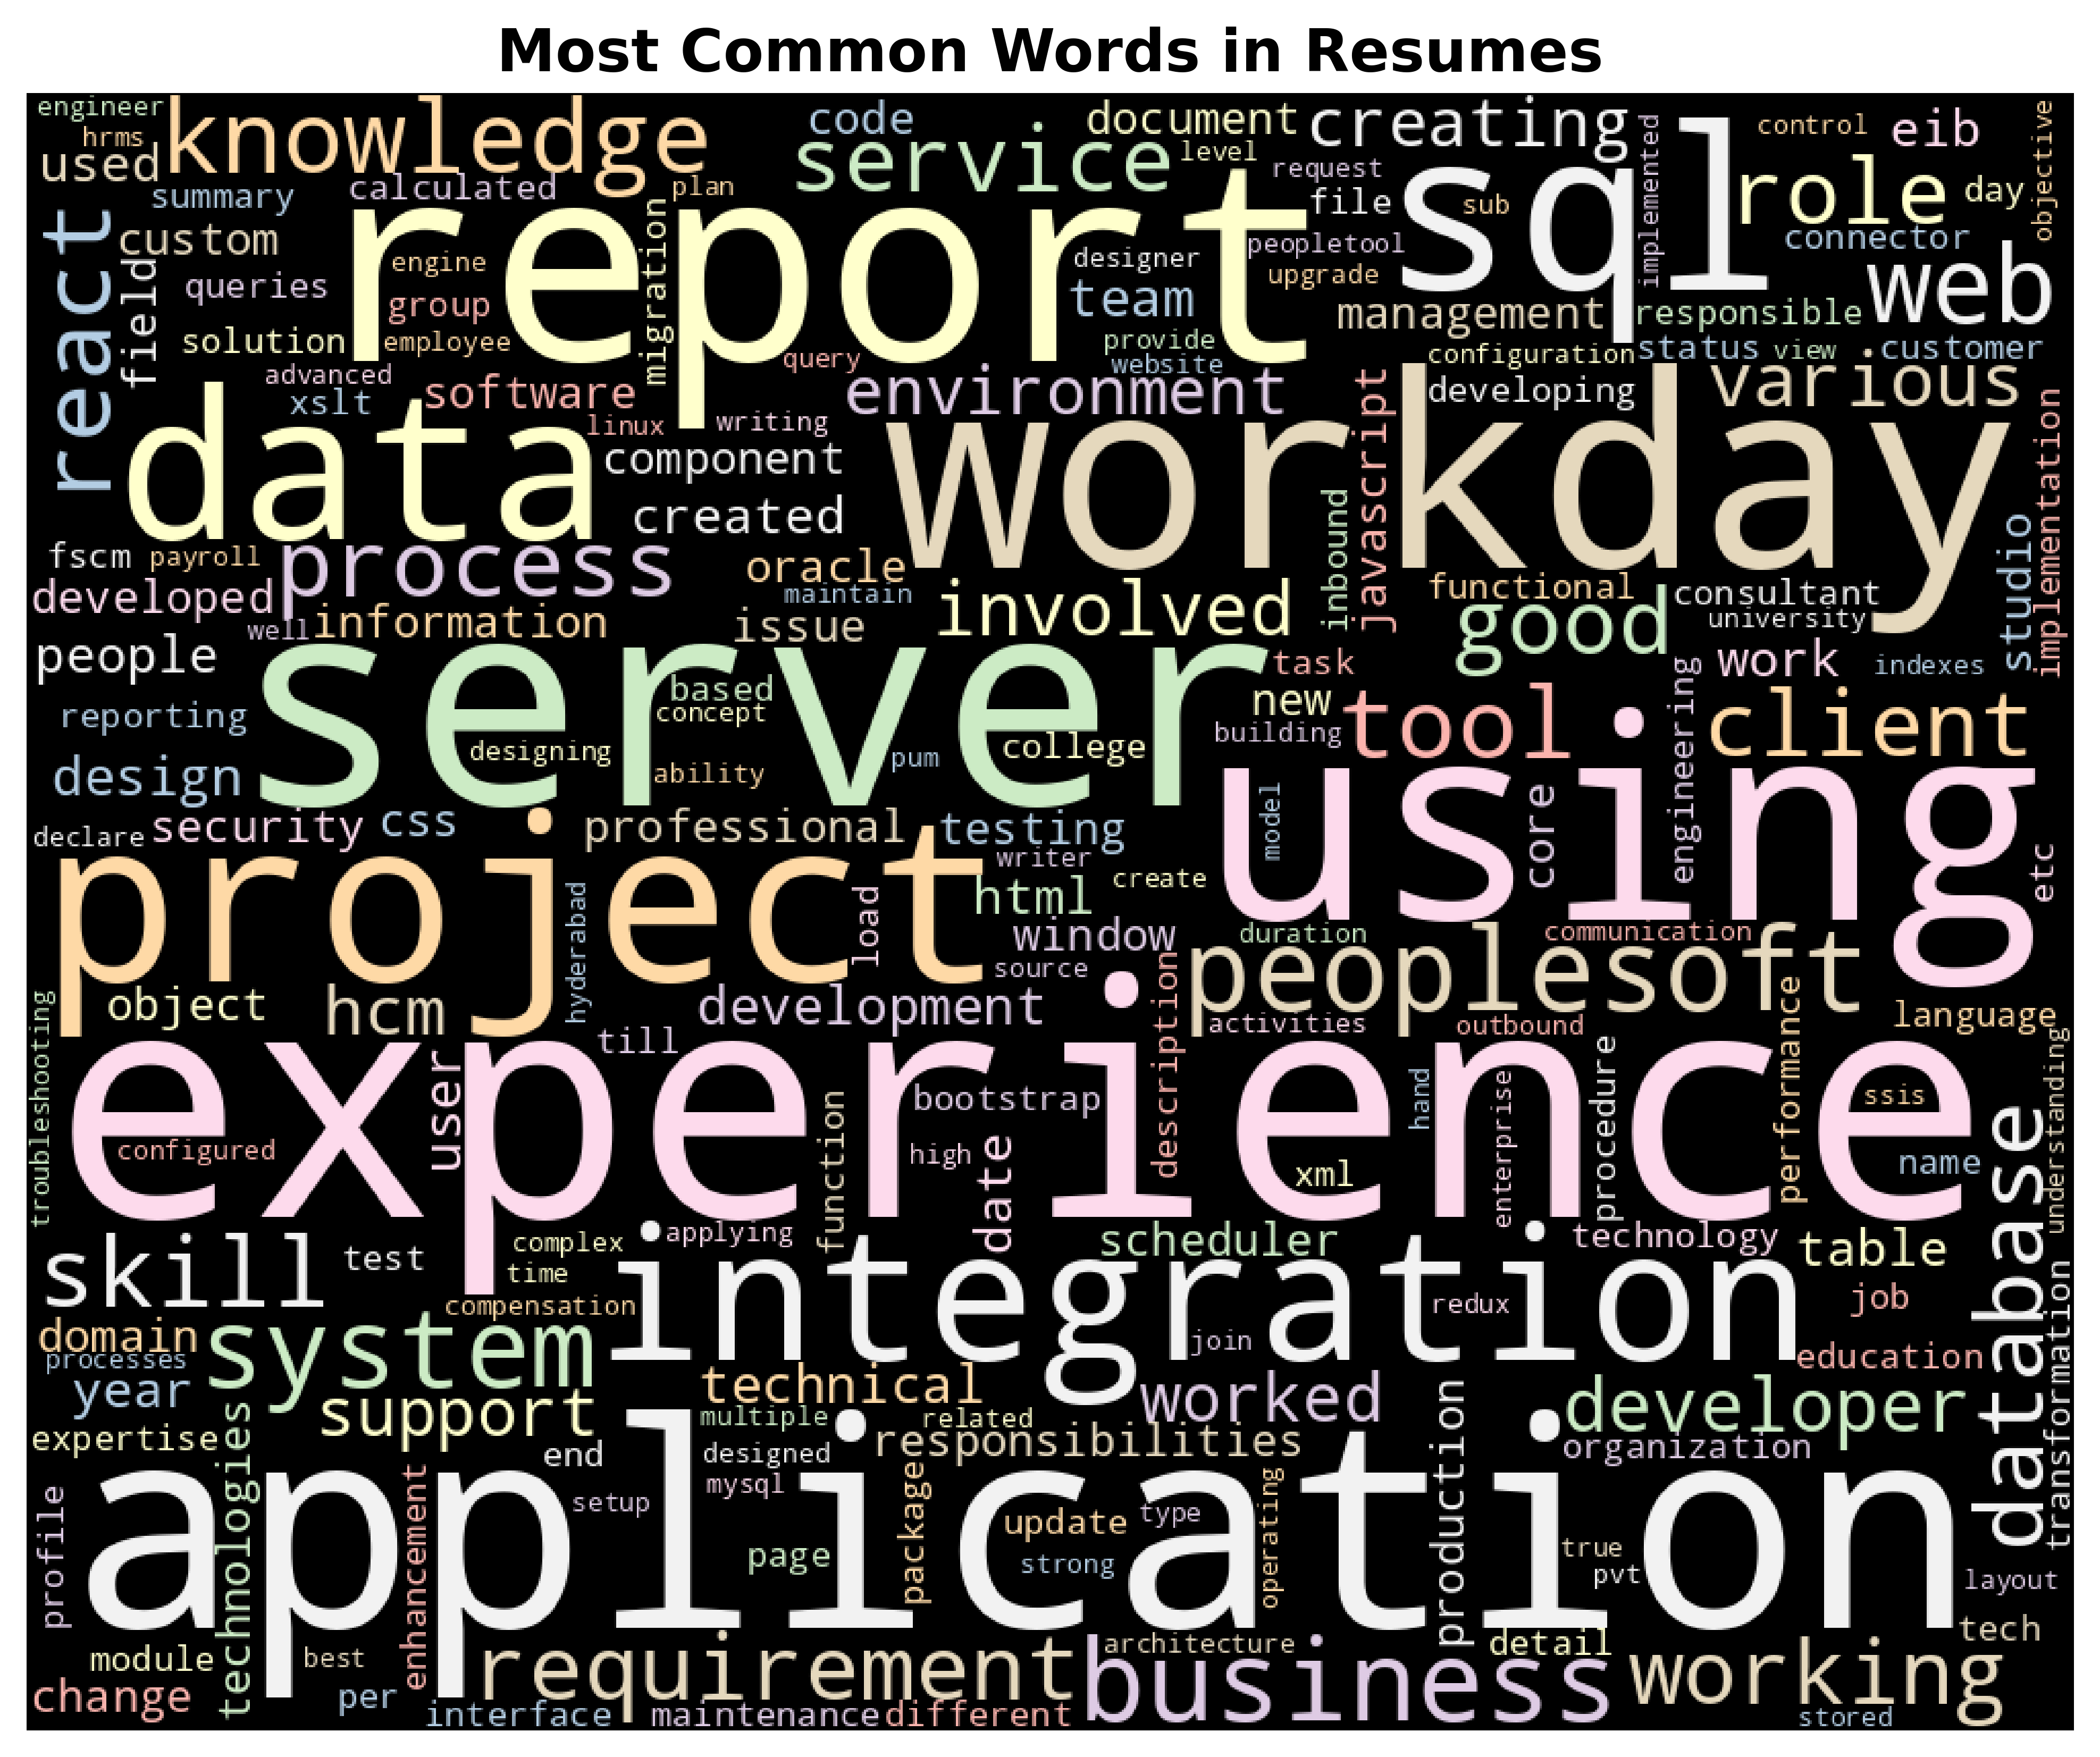

In [401]:
text = " ".join(cat for cat in resume_data.Final_Clean_Resumes) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black",
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [402]:
from sklearn.feature_extraction.text import TfidfVectorizer
requiredText = resume_data['Final_Clean_Resumes'].values
requiredTarget = resume_data['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [403]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state=45, test_size=0.20,stratify=requiredTarget)
X_train.shape, X_test.shape

((41, 3152), (11, 3152))

# Model Building

Logistic Regression

In [404]:
from sklearn.linear_model import LogisticRegression

In [405]:
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [406]:
predict1 = lg.predict(X_test)

In [407]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score
accuracy_1 = accuracy_score(y_test,predict1)
accuracy_1

0.8181818181818182

In [408]:
cm = confusion_matrix(y_test,predict1)
cm

array([[1, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

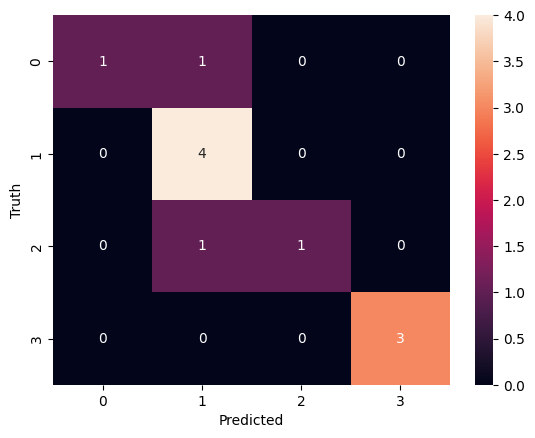

In [409]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [410]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict1))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.50      0.67         2
React JS Developer       0.67      1.00      0.80         4
     SQL Developer       1.00      0.50      0.67         2
           Workday       1.00      1.00      1.00         3

          accuracy                           0.82        11
         macro avg       0.92      0.75      0.78        11
      weighted avg       0.88      0.82      0.81        11



In [411]:
accuracy_1 = round(accuracy_score(y_test,predict1),4)
precision_1 = round(precision_score(y_test,predict1,average = 'macro'),4)
recall_1 = round(recall_score(y_test,predict1, average = 'macro'),4)
f1_1 = round(f1_score(y_test,predict1, average = 'macro'),4)

In [412]:
print('Accuracy Score  : ', accuracy_1)
print('Precision Score : ', precision_1)
print('Recall Score    : ', recall_1)
print('f1-Score        : ', f1_1)

Accuracy Score  :  0.8182
Precision Score :  0.9167
Recall Score    :  0.75
f1-Score        :  0.7833


Naive-Bayes Classifier

In [413]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)
predict2=nb.predict(X_test)

In [414]:
accuracy_2 = accuracy_score(y_test,predict2)
accuracy_2

0.8181818181818182

In [415]:
cm2=confusion_matrix(y_test,predict2)
cm2

array([[1, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

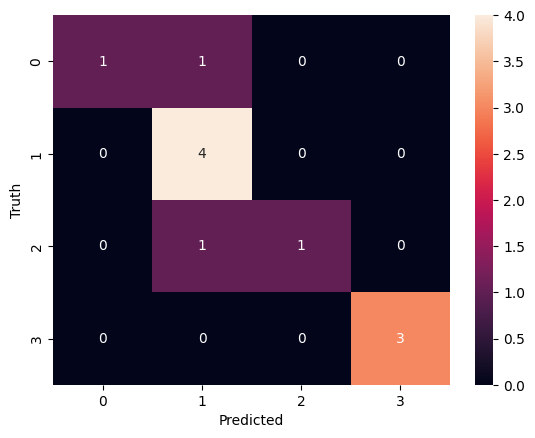

In [416]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [417]:
print(classification_report(y_test,predict2))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.50      0.67         2
React JS Developer       0.67      1.00      0.80         4
     SQL Developer       1.00      0.50      0.67         2
           Workday       1.00      1.00      1.00         3

          accuracy                           0.82        11
         macro avg       0.92      0.75      0.78        11
      weighted avg       0.88      0.82      0.81        11



In [418]:
accuracy_2 = round(accuracy_score(y_test,predict2),4)
precision_2 = round(precision_score(y_test,predict2,average = 'macro'),4)
recall_2 = round(recall_score(y_test,predict2, average = 'macro'),4)
f1_2 = round(f1_score(y_test,predict2, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_2)
print('Precision Score : ', precision_2)
print('Recall Score    : ', recall_2)
print('f1-Score        : ', f1_2)

Accuracy Score  :  0.8182
Precision Score :  0.9167
Recall Score    :  0.75
f1-Score        :  0.7833


Decision Tree Classifier

In [419]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
predict3=dt.predict(X_test)

In [420]:
accuracy_3 = accuracy_score(y_test,predict3)
accuracy_3

0.9090909090909091

In [421]:
cm3=confusion_matrix(y_test,predict3)
cm3

array([[2, 0, 0, 0],
       [1, 3, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

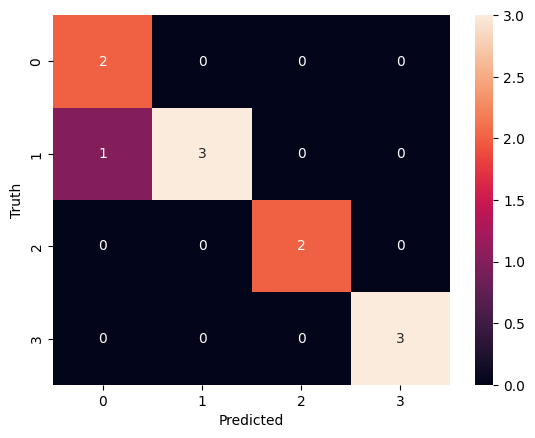

In [422]:
sns.heatmap(cm3,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [423]:
print(classification_report(y_test,predict3))

                    precision    recall  f1-score   support

        PeopleSoft       0.67      1.00      0.80         2
React JS Developer       1.00      0.75      0.86         4
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      1.00      1.00         3

          accuracy                           0.91        11
         macro avg       0.92      0.94      0.91        11
      weighted avg       0.94      0.91      0.91        11



In [424]:
accuracy_3 = round(accuracy_score(y_test,predict3),4)
precision_3 = round(precision_score(y_test,predict3,average = 'macro'),4)
recall_3 = round(recall_score(y_test,predict3, average = 'macro'),4)
f1_3 = round(f1_score(y_test,predict3, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_3)
print('Precision Score : ', precision_3)
print('Recall Score    : ', recall_3)
print('f1-Score        : ', f1_3)

Accuracy Score  :  0.9091
Precision Score :  0.9167
Recall Score    :  0.9375
f1-Score        :  0.9143


Support Vector Machine Classifier

In [425]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
predict4 = sv.predict(X_test)

In [426]:
accuracy_4 = accuracy_score(y_test,predict4)
accuracy_4

0.8181818181818182

In [427]:
cm4 = confusion_matrix(y_test,predict4)
cm4

array([[1, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

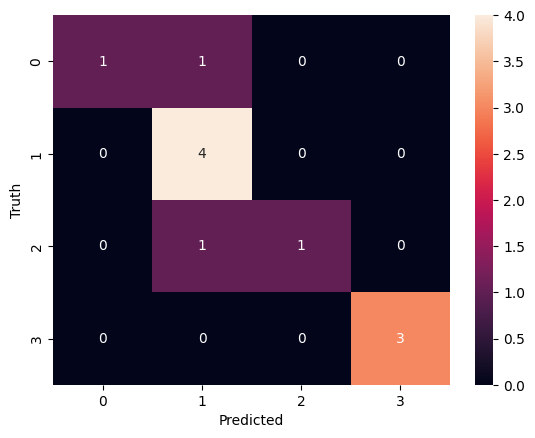

In [428]:
sns.heatmap(cm4,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [429]:
print(classification_report(y_test,predict4))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.50      0.67         2
React JS Developer       0.67      1.00      0.80         4
     SQL Developer       1.00      0.50      0.67         2
           Workday       1.00      1.00      1.00         3

          accuracy                           0.82        11
         macro avg       0.92      0.75      0.78        11
      weighted avg       0.88      0.82      0.81        11



In [430]:
accuracy_4 = round(accuracy_score(y_test,predict4),4)
precision_4 = round(precision_score(y_test,predict4,average = 'macro'),4)
recall_4 = round(recall_score(y_test,predict4, average = 'macro'),4)
f1_4 = round(f1_score(y_test,predict4, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_4)
print('Precision Score : ', precision_4)
print('Recall Score    : ', recall_4)
print('f1-Score        : ', f1_4)


Accuracy Score  :  0.8182
Precision Score :  0.9167
Recall Score    :  0.75
f1-Score        :  0.7833


Random forest Classifier

In [431]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predict5=rf.predict(X_test)

In [432]:
accuracy_5 = accuracy_score(y_test,predict5)
accuracy_5

0.9090909090909091

In [433]:
cm5=confusion_matrix(y_test,predict5)
cm5

array([[1, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

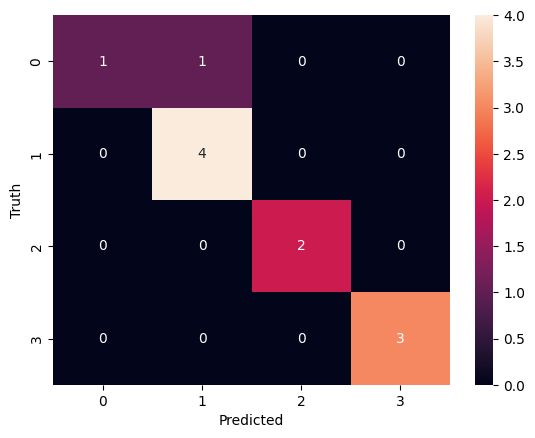

In [434]:
sns.heatmap(cm5,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [435]:
print(classification_report(y_test,predict5))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.50      0.67         2
React JS Developer       0.80      1.00      0.89         4
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      1.00      1.00         3

          accuracy                           0.91        11
         macro avg       0.95      0.88      0.89        11
      weighted avg       0.93      0.91      0.90        11



In [436]:
accuracy_5 = round(accuracy_score(y_test,predict5),4)
precision_5 = round(precision_score(y_test,predict5,average = 'macro'),4)
recall_5 = round(recall_score(y_test,predict5, average = 'macro'),4)
f1_5 = round(f1_score(y_test,predict5, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_5)
print('Precision Score : ', precision_5)
print('Recall Score    : ', recall_5)
print('f1-Score        : ', f1_5)

Accuracy Score  :  0.9091
Precision Score :  0.95
Recall Score    :  0.875
f1-Score        :  0.8889


In [437]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

AdaBoost classifier

In [438]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
predict6=ab.predict(X_test)

In [439]:
accuracy_6 = accuracy_score(y_test,predict6)
accuracy_6

1.0

In [440]:
cm6 = confusion_matrix(y_test,predict6)
cm6

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

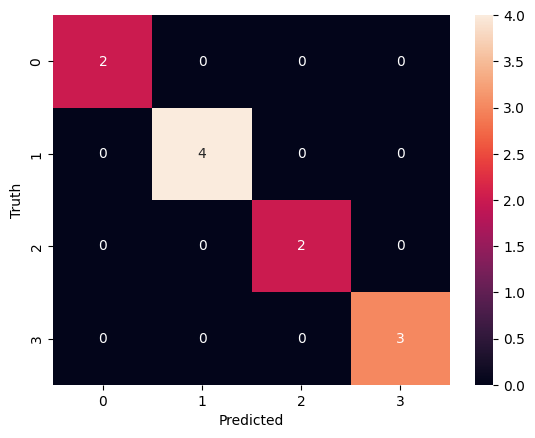

In [441]:
sns.heatmap(cm6,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [442]:
print(classification_report(y_test,predict6))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         4
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        11
         macro avg       1.00      1.00      1.00        11
      weighted avg       1.00      1.00      1.00        11



In [443]:
accuracy_6 = round(accuracy_score(y_test,predict6),4)
precision_6 = round(precision_score(y_test,predict6,average = 'macro'),4)
recall_6 = round(recall_score(y_test,predict6, average = 'macro'),4)
f1_6 = round(f1_score(y_test,predict6, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_6)
print('Precision Score : ', precision_6)
print('Recall Score    : ', recall_6)
print('f1-Score        : ', f1_6)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


Gradient Boosting

In [444]:
gd = GradientBoostingClassifier()
gd.fit(X_train,y_train)
predict7 = gd.predict(X_test)


In [445]:
accuracy_7 = accuracy_score(y_test,predict7)
accuracy_7

1.0

In [446]:
cm7 = confusion_matrix(y_test,predict7)
cm7

array([[2, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

Text(50.722222222222214, 0.5, 'Truth')

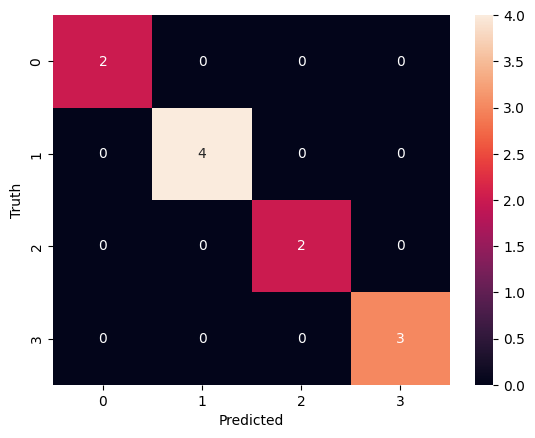

In [447]:
sns.heatmap(cm7,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [448]:
print(classification_report(y_test,predict7))

                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         4
     SQL Developer       1.00      1.00      1.00         2
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        11
         macro avg       1.00      1.00      1.00        11
      weighted avg       1.00      1.00      1.00        11



In [449]:
accuracy_7 = round(accuracy_score(y_test,predict7),4)
precision_7 = round(precision_score(y_test,predict7,average = 'macro'),4)
recall_7 = round(recall_score(y_test,predict7, average = 'macro'),4)
f1_7 = round(f1_score(y_test,predict7, average = 'macro'),4)

print('Accuracy Score  : ', accuracy_7)
print('Precision Score : ', precision_7)
print('Recall Score    : ', recall_7)
print('f1-Score        : ', f1_7)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


In [450]:
table = {'Classifier' : ['Logistic Regression','Naive-Bayes Classifier','Decision Tree Classifier','SVC Classifier','Random tree classifier','AdaBoost Classifier', 'Gradient Boosting Classifier'], 'Accuracy' : [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6, accuracy_7], 'Precision Score' : [precision_1, precision_2, precision_3, precision_4, precision_5, precision_6, precision_7], 'Recall Score' : [recall_1, recall_2, recall_3, recall_4, recall_5, recall_6, recall_7], 'F1_Score' : [f1_1, f1_2, f1_3, f1_4, f1_5, f1_6, f1_7]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,Logistic Regression,0.8182,0.9167,0.7500,0.7833
1,Naive-Bayes Classifier,0.8182,0.9167,0.7500,0.7833
2,SVC Classifier,0.8182,0.9167,0.7500,0.7833
3,Decision Tree Classifier,0.9091,0.9167,0.9375,0.9143
4,Random tree classifier,0.9091,0.9500,0.8750,0.8889
5,AdaBoost Classifier,1.0000,1.0000,1.0000,1.0000
6,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000


In [451]:
import pickle
from pickle import dump
from pickle import load

# Model deployment

In [452]:
!pip install PyPDF2
!pip install streamlit
!pip install textract
!pip install python-docx
!pip install scikit-learn
!pip install pdfplumber
!pip install pdf2dox
!pip install python-docx


  Using cached pdfminer.six-20221105-py3-none-any.whl (5.6 MB)
  Attempting uninstall: pdfminer.six
    Found existing installation: pdfminer.six 20191110
    Uninstalling pdfminer.six-20191110:
      Successfully uninstalled pdfminer.six-20191110
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
textract 1.6.5 requires pdfminer.six==20191110, but you have pdfminer-six 20221105 which is incompatible.


ERROR: Could not find a version that satisfies the requirement pdf2dox (from versions: none)
ERROR: No matching distribution found for pdf2dox


In [453]:
import pickle
filename = 'RF_model.pkl'
pickle.dump(rf,open(filename,'wb'))

In [454]:
filename = 'vector.pkl'
pickle.dump(word_vectorizer,open(filename,'wb'))

In [455]:
# IMPORT LIBRARIES
import re
import PyPDF2
import docx2txt
import pdfplumber
import pandas as pd
import streamlit as st

import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer


In [460]:
%%writefile app.py
# IMPORT LIBRARIES
import re
import PyPDF2
import docx2txt
import pdfplumber
import pandas as pd
import streamlit as st

import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

#----------------------------------------------------------------------------------------------------

st.title('RESUME CLASSIFICATION')
st.markdown('<style>h1{color: Purple;}</style>', unsafe_allow_html=True)
st.subheader('Welcome to Resume Classification App')

# FUNCTIONS
def extract_skills(resume_text):
    nlp_text = nlp(resume_text)
    noun_chunks = nlp_text.noun_chunks
    tokens = [token.text for token in nlp_text if not token.is_stop] # removing stop words and implementing word tokenization

    data = pd.read_csv(r"skills.csv") # reading the csv file
    skills = list(data.columns.values) # extract values
    skillset = []

    for token in tokens: # check for one-grams (example: python)
        if token.lower() in skills:
            skillset.append(token)

    for token in noun_chunks: # check for bi-grams and tri-grams (example: machine learning)
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
    return [i.capitalize() for i in set([i.lower() for i in skillset])]

def getText(filename):
    fullText = '' # Create empty string
    if filename.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        doc = docx2txt.process(filename)
        for para in doc:
            fullText = fullText + para
    else:
        with pdfplumber.open(filename) as pdf_file:
            pdoc = PyPDF2.PdfFileReader(filename)
            number_of_pages = pdoc.getNumPages()
            page = pdoc.pages[0]
            page_content = page.extractText()
        for paragraph in page_content:
            fullText =  fullText + paragraph
    return (fullText)

def display(doc_file):
    resume = []
    if doc_file.type == "application/vnd.openxmlformats-officedocument.wordprocessingml.document":
        resume.append(docx2txt.process(doc_file))
    else:
        with pdfplumber.open(doc_file) as pdf:
            pages=pdf.pages[0]
            resume.append(pages.extract_text())
    return resume

def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

file_type=pd.DataFrame([], columns=['Uploaded File',  'Predicted Profile','Skills',])
filename = []
predicted = []
skills = []

#-------------------------------------------------------------------------------------------------
# MAIN CODE
import pickle as pk
model = pk.load(open(r'RF_model.pkl', 'rb'))
Vectorizer = pk.load(open(r'vector.pkl', 'rb'))

upload_file = st.file_uploader('Upload Your Resumes', type= ['docx','pdf'],accept_multiple_files=True)

for doc_file in upload_file:
    if doc_file is not None:
        filename.append(doc_file.name)
        cleaned = preprocess(display(doc_file))
        prediction = model.predict(Vectorizer.transform([cleaned]))[0]
        predicted.append(prediction)
        extText = getText(doc_file)
        skills.append(extract_skills(extText))

if len(predicted) > 0:
    file_type['Uploaded File'] = filename
    file_type['Skills'] = skills
    file_type['Predicted Profile'] = predicted
    st.table(file_type.style.format())

select = ['PeopleSoft','SQL Developer','React JS Developer','Workday']
st.subheader('Select as per Requirement')
option = st.selectbox('Fields',select)

if option == 'PeopleSoft':
    st.table(file_type[file_type['Predicted Profile'] == 'PeopleSoft'])
elif option == 'SQL Developer':
    st.table(file_type[file_type['Predicted Profile'] == 'SQL Developer'])
elif option == 'React JS Developer':
    st.table(file_type[file_type['Predicted Profile'] == 'React JS Developer'])
elif option == 'Workday':
    st.table(file_type[file_type['Predicted Profile'] == 'Workday'])

Overwriting app.py


In [461]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.529s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [462]:
!streamlit run app.py &>/content/logs.txt &

In [463]:
!npx localtunnel --port 8501  & curl ipv4.icanhazip.com

104.196.152.133
npx: installed 22 in 2.018s
your url is: https://twelve-zebras-invite.loca.lt
